In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/',)

In [ ]:
avocado_df = pd.read_csv('/content/drive/My Drive/Dataset/avocado.csv')
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

explore dataset

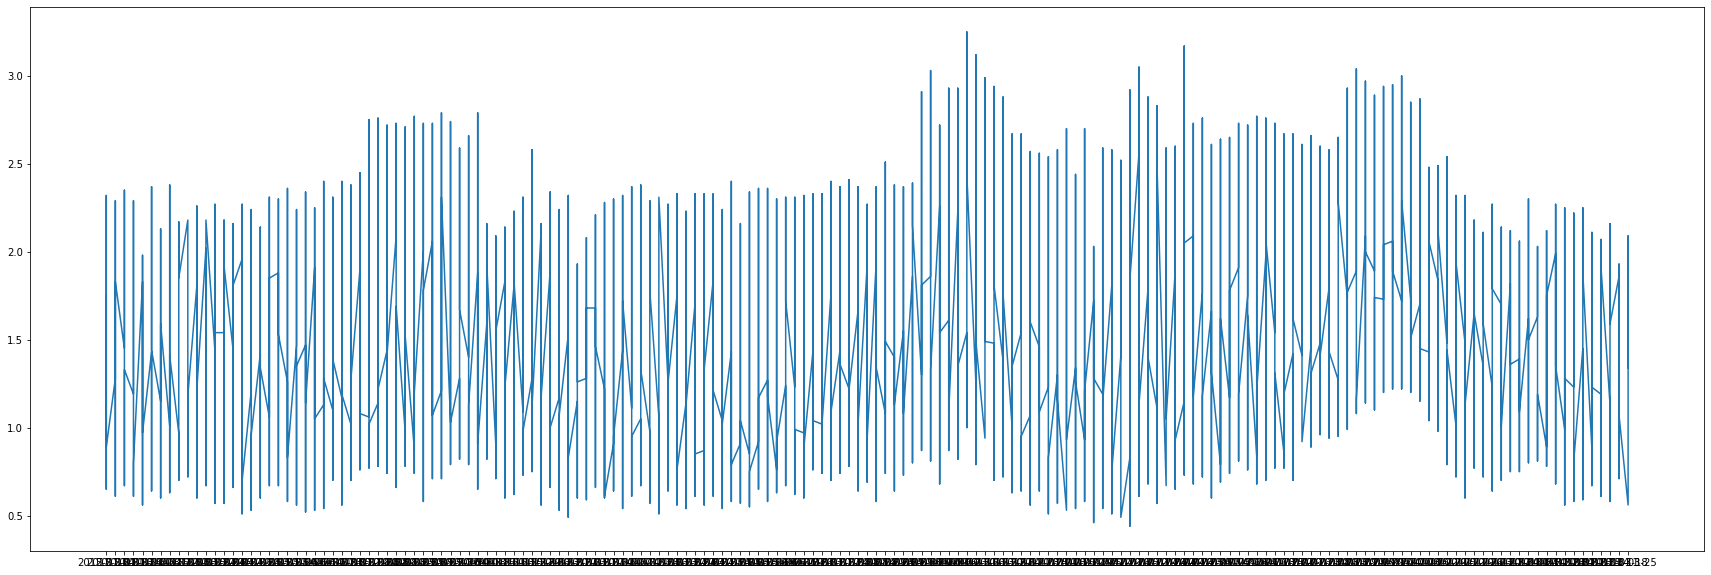

In [ ]:
avocado_df = avocado_df.sort_values('Date')
plt.figure(figsize = (30,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

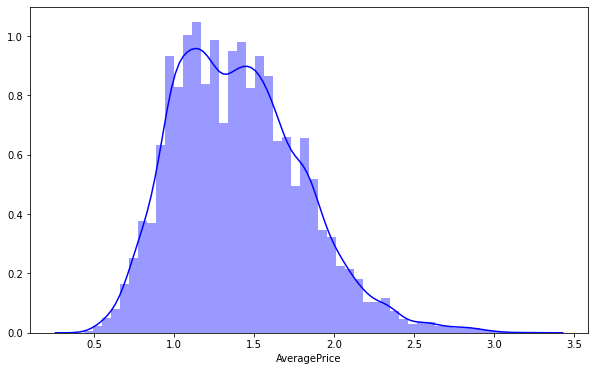

In [ ]:
# Plot distribution of the average price
plt.figure(figsize = (10,6))
sns.distplot(avocado_df['AveragePrice'], color = 'b')

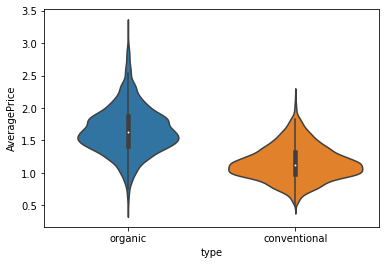

In [ ]:
# plot a violin plot of the average price vs avocado type
sns.violinplot(y= 'AveragePrice',x= 'type', data= avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

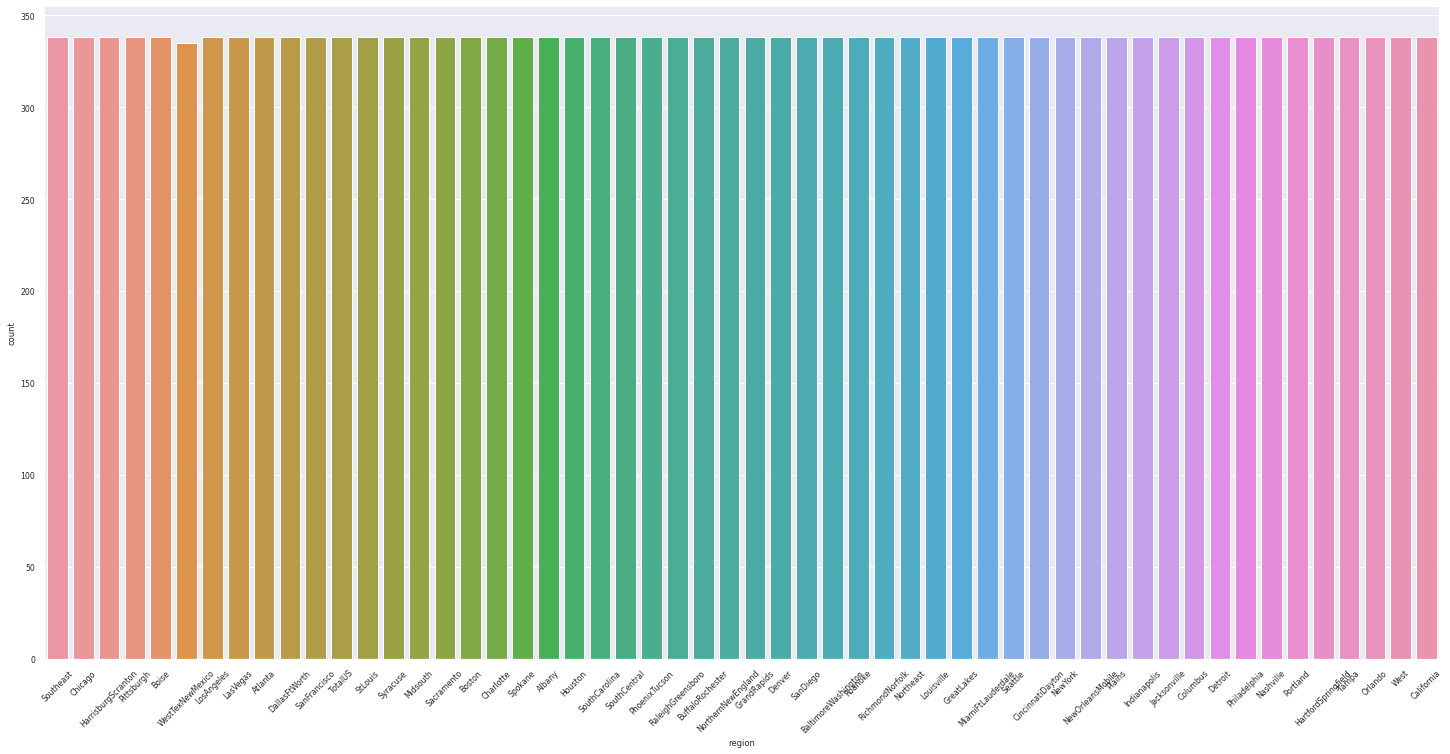

In [ ]:
# bar chart to indicate the number of regions
sns.set(font_scale= 0.7)
plt.figure(figsize=[25,12])
sns.countplot(x='region',data = avocado_df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

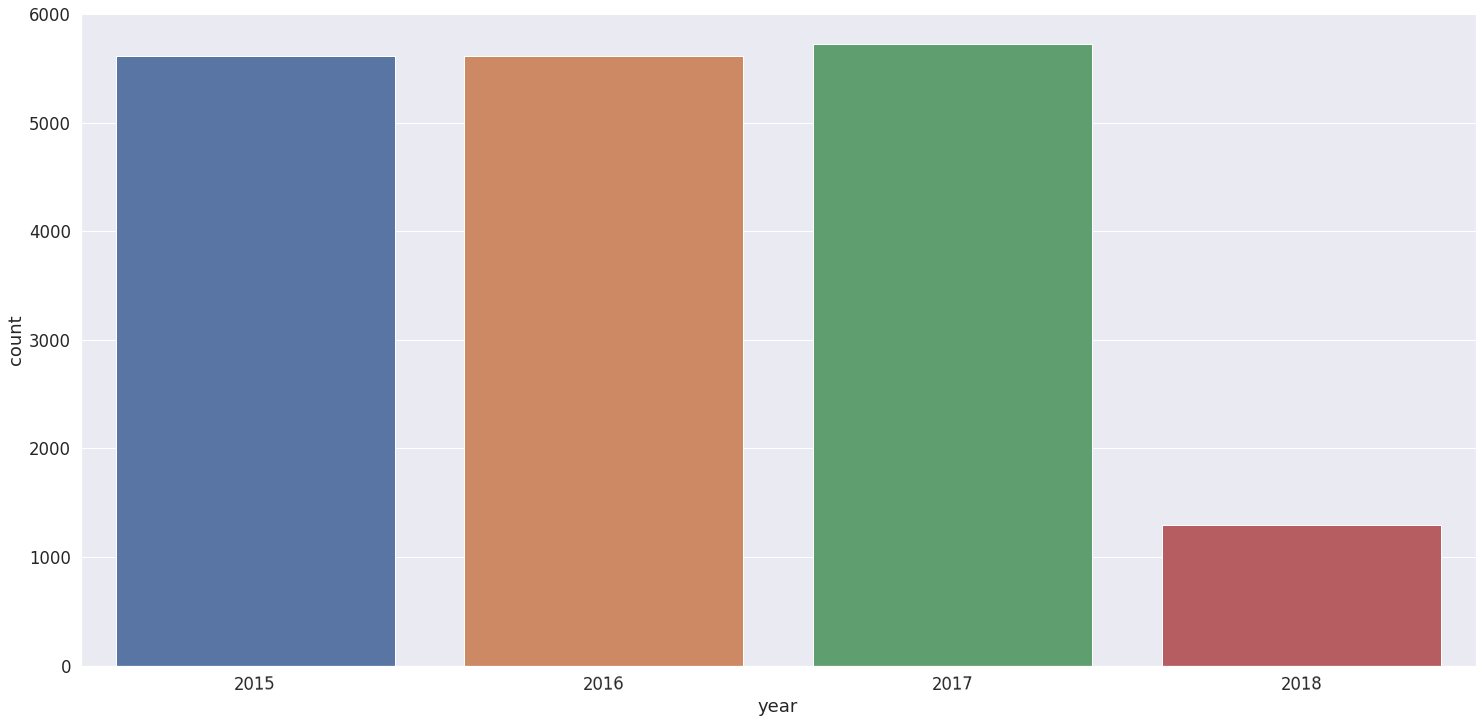

In [ ]:
# bar chart to indicate the count in every year
sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x='year',data=avocado_df)
plt.xticks(rotation = 1)

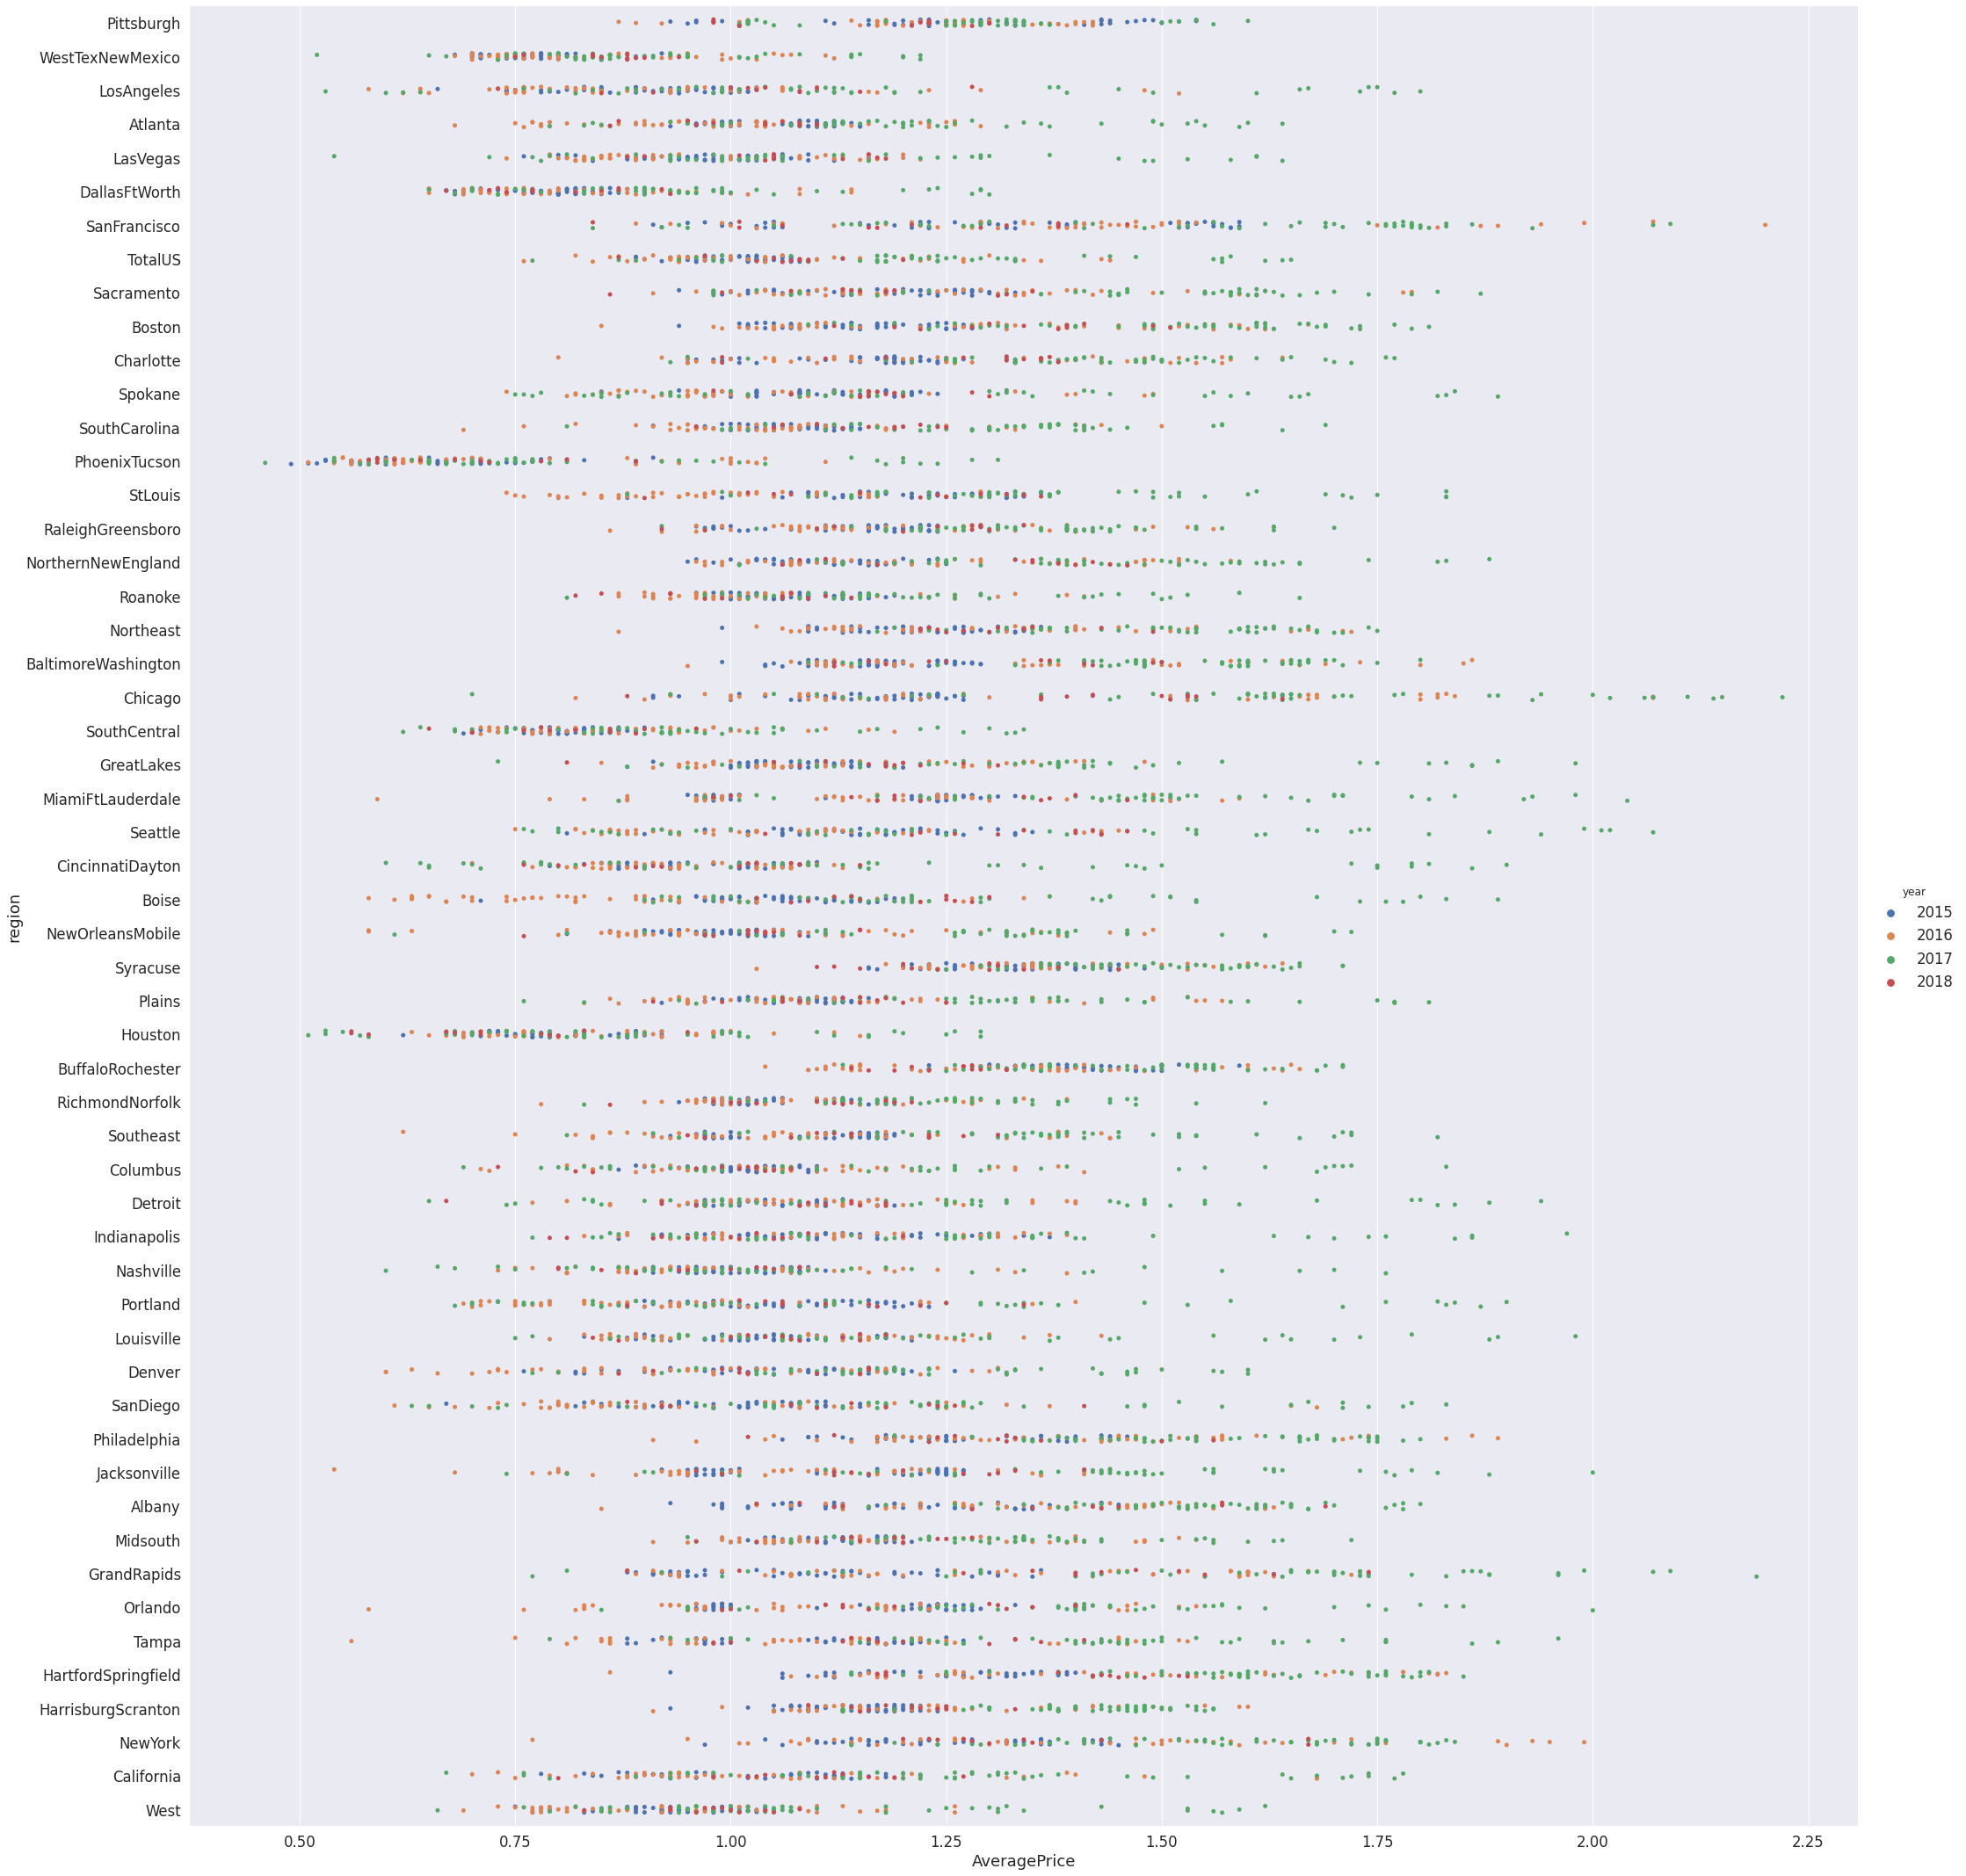

In [ ]:
# plot the avocado prices vs region for conventional avocados
conventional = sns.catplot('AveragePrice','region',data =avocado_df[avocado_df['type'] =='conventional'],
hue = 'year',
height = 30)

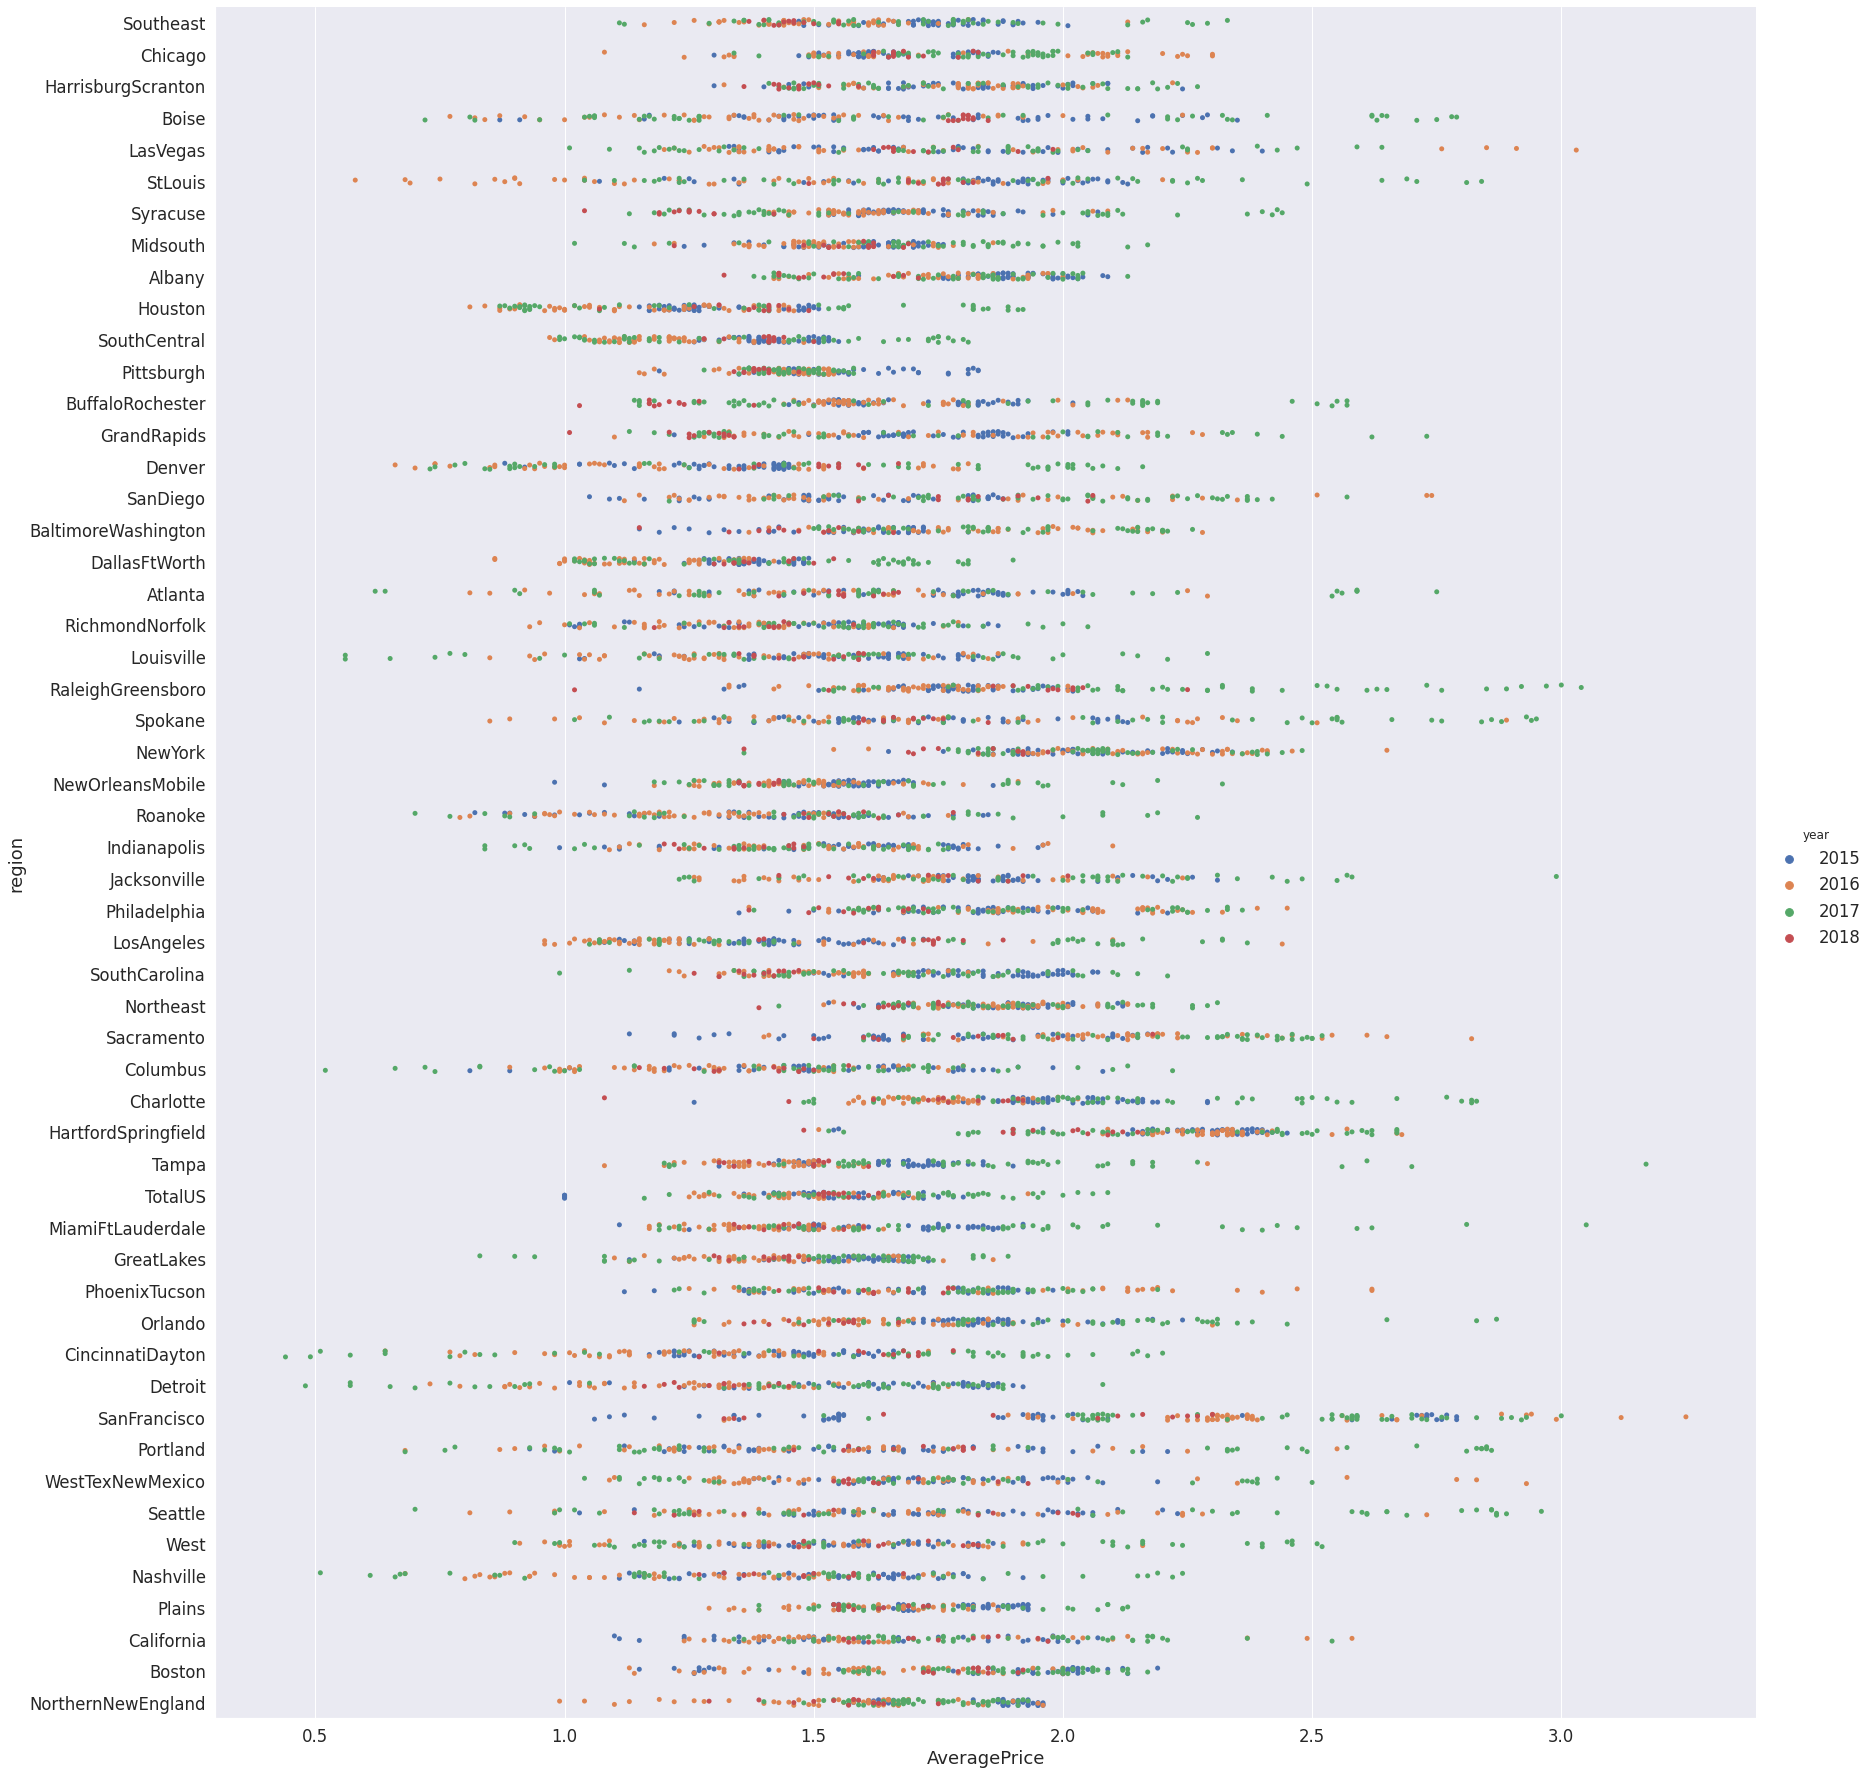

In [ ]:
organic = sns.catplot('AveragePrice','region',data =avocado_df[avocado_df['type'] =='organic'],
hue = 'year',
height = 25)

Prepare the dataset

In [ ]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
8730,0,2018-03-25,1.01,382746.42,76054.73,122475.03,6496.13,177720.53,75499.86,101806.23,414.44,conventional,2018,LasVegas
8598,0,2018-03-25,0.96,264778.18,77671.02,21732.24,3272.61,162102.31,133163.77,28160.04,778.50,conventional,2018,Columbus


In [40]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
8730,2018-03-25,1.01
8598,2018-03-25,0.96


In [41]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date' : 'ds', 'AveragePrice':'y'})
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
8730,2018-03-25,1.01
8598,2018-03-25,0.96


develop forecasting model and make prediction

In [42]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


forecasting into the future

In [46]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500025,0.886087,1.830068,1.500025,1.500025,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,0.0,0.0,0.0,1.382710
1,2015-01-04,1.500025,0.882402,1.842751,1.500025,1.500025,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,0.0,0.0,0.0,1.382710
2,2015-01-04,1.500025,0.916213,1.868842,1.500025,1.500025,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,0.0,0.0,0.0,1.382710
3,2015-01-04,1.500025,0.899351,1.839731,1.500025,1.500025,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,0.0,0.0,0.0,1.382710
4,2015-01-04,1.500025,0.899442,1.881397,1.500025,1.500025,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,-0.117315,0.0,0.0,0.0,1.382710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.165175,0.525993,1.568193,0.964547,1.368142,-0.085849,-0.085849,-0.085849,-0.085849,-0.085849,-0.085849,0.0,0.0,0.0,1.079326
18610,2019-03-22,1.164446,0.572385,1.568407,0.963239,1.367973,-0.084061,-0.084061,-0.084061,-0.084061,-0.084061,-0.084061,0.0,0.0,0.0,1.080385
18611,2019-03-23,1.163717,0.548497,1.596452,0.961953,1.368495,-0.081995,-0.081995,-0.081995,-0.081995,-0.081995,-0.081995,0.0,0.0,0.0,1.081722
18612,2019-03-24,1.162988,0.537337,1.607268,0.960334,1.369070,-0.079671,-0.079671,-0.079671,-0.079671,-0.079671,-0.079671,0.0,0.0,0.0,1.083317


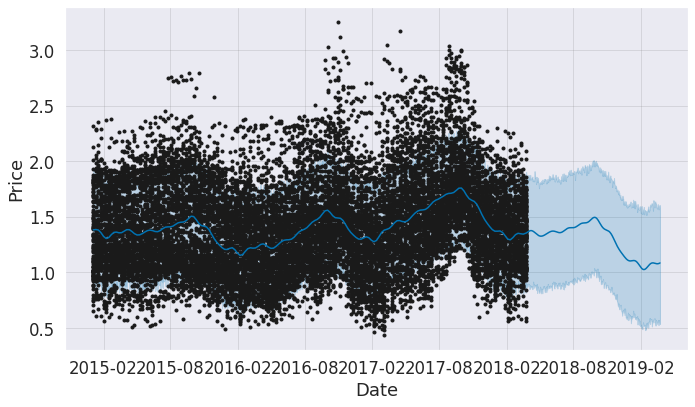

In [47]:
figure = m.plot(forecast,xlabel = 'Date',ylabel='Price')

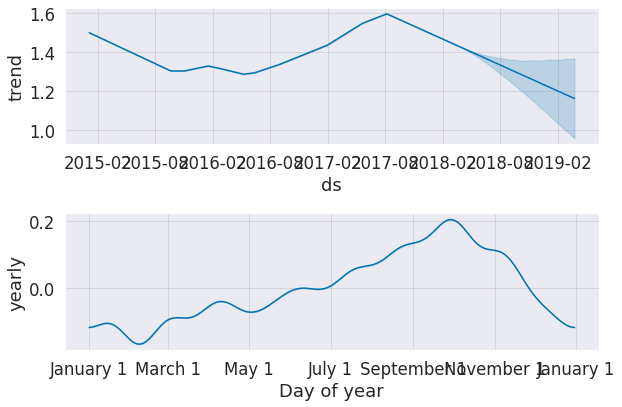

In [48]:
figure2 = m.plot_components(forecast)